# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv('risk_factor_surveillance_database.csv')
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Asian,RACE,RACEASN
53388,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Hawaiian/Pacific Islander,RACE,RACEHPI
53389,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
53390,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,2 or more races,RACE,RACE2PLUS


# Removing rows with no sample sizes.

In [3]:
df.drop(df[df['Data_Value_Footnote_Symbol'] == '~'].index, inplace=True)

# Dropping Unnecessary Columns

In [4]:
df = df.drop(
    ['YearEnd', 'LocationDesc', 'LocationDesc', 'ClassID', 'TopicID', 'DataValueTypeID',
     'StratificationCategoryId1', 'Stratification1', 'StratificationCategory1', 'Data_Value_Footnote',
     'Data_Value_Footnote_Symbol', 'Data_Value_Alt', 'Data_Value_Type', 'Data_Value_Unit', 'Question', 'Topic', 'Class',
     'LocationAbbr', 'Datasource', 'GeoLocation',
     'Low_Confidence_Limit', 'High_Confidence_Limit '],
    axis=1)
df

,YearStart,Data_Value,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,QuestionID,LocationID,StratificationID1
0,2011,32.0,7304.0,Total,NaN,NaN,NaN,NaN,NaN,Q036,1,OVERALL
1,2011,32.3,2581.0,NaN,NaN,NaN,Male,NaN,NaN,Q036,1,MALE
2,2011,31.8,4723.0,NaN,NaN,NaN,Female,NaN,NaN,Q036,1,FEMALE
3,2011,33.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,Q036,1,EDUHS
4,2011,32.8,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN,Q036,1,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...,...,...
53382,2016,13.3,212.0,NaN,NaN,NaN,NaN,"$75,000 or greater",NaN,Q047,78,INC75PLUS
53383,2016,25.3,137.0,NaN,NaN,NaN,NaN,Data not reported,NaN,Q047,78,INCNR
53384,2016,18.3,154.0,NaN,NaN,NaN,NaN,NaN,Non-Hispanic White,Q047,78,RACEWHT
53385,2016,24.1,820.0,NaN,NaN,NaN,NaN,NaN,Non-Hispanic Black,Q047,78,RACEBLK


# Getting obesity data

In [5]:
obesity_df = df.loc[(df.QuestionID == 'Q036') | (df.QuestionID == 'Q037')]
obesity_df = obesity_df.drop(['StratificationID1', 'QuestionID'], axis=1)
obesity_df

,YearStart,Data_Value,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,LocationID
0,2011,32.0,7304.0,Total,NaN,NaN,NaN,NaN,NaN,1
1,2011,32.3,2581.0,NaN,NaN,NaN,Male,NaN,NaN,1
2,2011,31.8,4723.0,NaN,NaN,NaN,Female,NaN,NaN,1
3,2011,33.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,1
4,2011,32.8,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
51842,2016,32.6,206.0,NaN,NaN,NaN,NaN,"$75,000 or greater",NaN,78
51843,2016,31.8,106.0,NaN,NaN,NaN,NaN,Data not reported,NaN,78
51844,2016,21.3,148.0,NaN,NaN,NaN,NaN,NaN,Non-Hispanic White,78
51845,2016,34.3,783.0,NaN,NaN,NaN,NaN,NaN,Non-Hispanic Black,78


# Feature based total obesity plot

<Axes: >

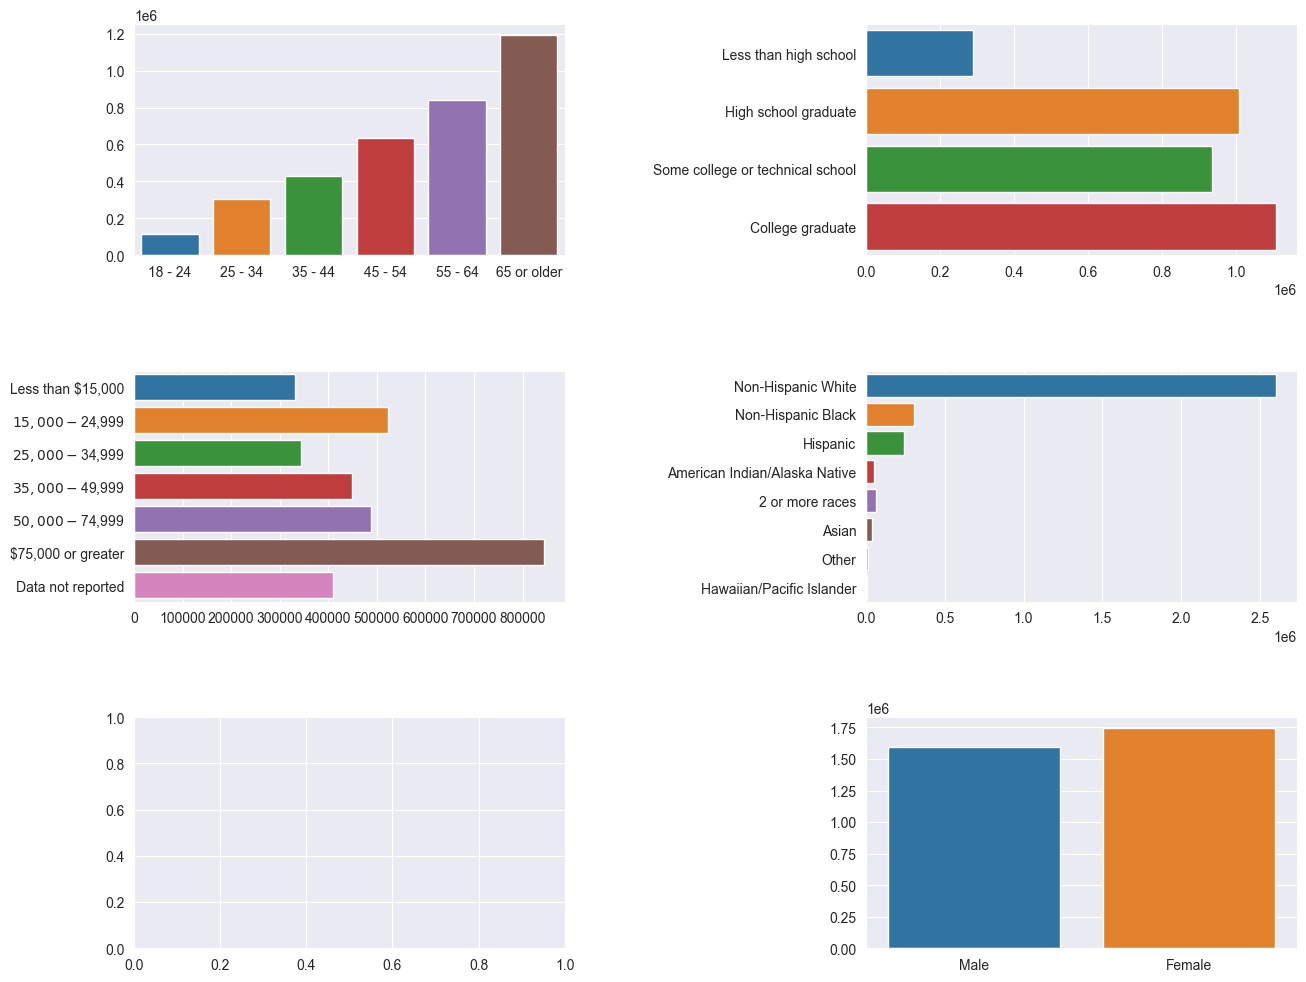

In [6]:
fig, ax = plt.subplots(3, 2, figsize=(15, 12))
fig.subplots_adjust(wspace=0.7, hspace=0.5)
age_obesity = [['18 - 24', 112991], ['25 - 34', 304896],
               ['35 - 44', 430068], ['45 - 54', 634132],
               ['55 - 64', 842137], ['65 or older', 1191278]]
sns.barplot(x=[i[0] for i in age_obesity], y=[i[1] for i in age_obesity], ax=ax[0][0])

education_obesity = [['Less than high school', 289407],
                     ['High school graduate', 1008725],
                     ['Some college or technical school', 935977],
                     ['College graduate', 1108458]]
sns.barplot(x=[i[1] for i in education_obesity], y=[i[0] for i in education_obesity], ax=ax[0][1])

plt.xticks(fontsize=10)
gender_obesity = [['Male', 1594904], ['Female', 1743336]]
sns.barplot(x=[i[0] for i in gender_obesity], y=[i[1] for i in gender_obesity])

plt.yticks(fontsize=10)
income_obesity = [['Less than $15,000', 330472],
                  ['$15,000 - $24,999', 523858],
                  ['$25,000 - $34,999', 344357],
                  ['$35,000 - $49,999', 449066],
                  ['$50,000 - $74,999', 487675],
                  ['$75,000 or greater', 844419],
                  ['Data not reported', 409125]]
sns.barplot(x=[i[1] for i in income_obesity], y=[i[0] for i in income_obesity], ax=ax[1][0])

plt.yticks(fontsize=10)
race_obesity = [['Non-Hispanic White', 2603474],
                ['Non-Hispanic Black', 305127],
                ['Hispanic', 241210],
                ['American Indian/Alaska Native', 53624],
                ['2 or more races', 62771],
                ['Asian', 40898],
                ['Other', 13632],
                ['Hawaiian/Pacific Islander', 5915]]
sns.barplot(x=[i[1] for i in race_obesity], y=[i[0] for i in race_obesity], ax=ax[1][1])

count    16254.000000
mean        31.927925
std          6.627183
min          0.900000
25%         28.200000
50%         32.800000
75%         36.500000
max         60.400000
Name: Data_Value, dtype: float64
Upper Band:  48.95
Lower Band:  15.749999999999998


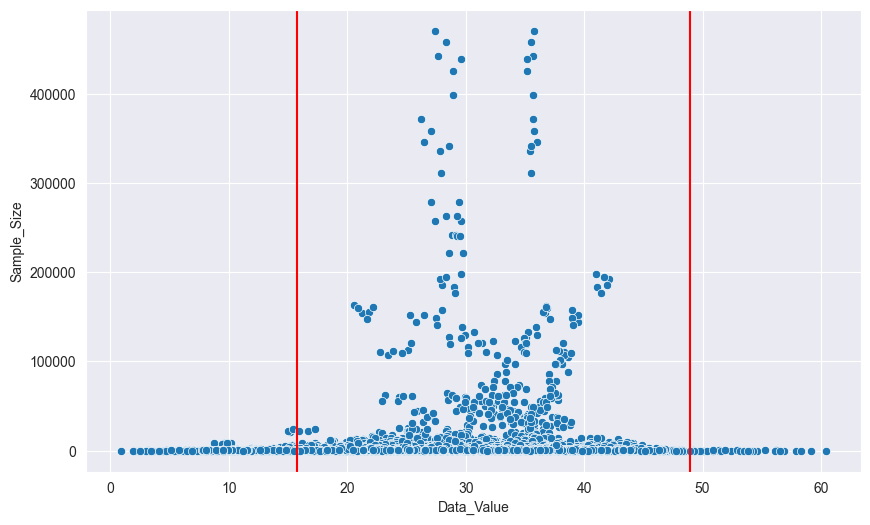

In [7]:
print(obesity_df['Data_Value'].describe())
sns.scatterplot(x=obesity_df['Data_Value'], y=obesity_df['Sample_Size'])

# Getting IQR Range
q1 = np.percentile(obesity_df['Data_Value'], 25, method='midpoint')
q3 = np.percentile(obesity_df['Data_Value'], 75, method='midpoint')
IQR = q3 - q1
upper = q3 + 1.5 * IQR
lower = q1 - 1.5 * IQR
print('Upper Band: ', upper)
print('Lower Band: ', lower)

plt.axvline(x=upper, color='r')
plt.axvline(x=lower, color='r')

# Removing Outliers

In [8]:
obesity_df = obesity_df[(obesity_df['Data_Value'] <= upper) & (obesity_df['Data_Value'] >= lower)]

# Testing Label and Ordinal Encoding

In [9]:
# XGBoost handles NaN values itself so no need to handle them.

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

obesity_df_1 = obesity_df.copy()
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder()
ordinal_columns = ['Age(years)', 'YearStart', 'Education', 'Income']
label_columns = ['Gender', 'Race/Ethnicity', 'Total', 'LocationID']

for col in ordinal_columns:
    obesity_df_1[col] = ordinal_encoder.fit_transform(obesity_df_1[col].to_numpy().reshape(-1, 1))

for col in label_columns:
    obesity_df_1[col] = label_encoder.fit_transform(obesity_df_1[col])

In [10]:
x = obesity_df_1.drop('Data_Value', axis=1)
y = obesity_df_1['Data_Value']
my_model = XGBRegressor(tree_method='gpu_hist', max_depth=8, subsample=0.01, learning_rate=0.01, n_estimators=500)
scores = -1 * cross_val_score(my_model, x, y, cv=10, scoring='neg_mean_squared_error')
print('MSE: ', scores.mean())

MSE:  28.261682597856595


# Testing One-Hot Encoder

In [11]:
obesity_df_2 = obesity_df.copy()
obesity_df_2 = pd.get_dummies(data=obesity_df_2,
                              columns=ordinal_columns + label_columns, dtype=int)

In [12]:
from sklearn.model_selection import cross_validate

x = obesity_df_2.drop('Data_Value', axis=1)
y = obesity_df_2['Data_Value']

my_model_2 = XGBRegressor(tree_method='gpu_hist', max_depth=8, subsample=0.01, learning_rate=0.01, n_estimators=500)
cv = cross_validate(my_model_2, x, y, scoring='neg_mean_squared_error', cv=10, return_estimator=True)
print('MSE: ', (cv['test_score'] * -1).mean())


MSE:  26.333025665085678


In [13]:
# Printing feature importance
coeff = ([{feature: importance} for feature, importance in zip(x.columns, cv['estimator'][9].feature_importances_)])
coeff

[{'Sample_Size': 0.0090625165},
 {'Age(years)_18 - 24': 0.0191736},
 {'Age(years)_25 - 34': 0.012416129},
 {'Age(years)_35 - 44': 0.006216441},
 {'Age(years)_45 - 54': 0.0071383337},
 {'Age(years)_55 - 64': 0.007723698},
 {'Age(years)_65 or older': 0.016607527},
 {'YearStart_2011': 0.009870752},
 {'YearStart_2012': 0.010227465},
 {'YearStart_2013': 0.0079125855},
 {'YearStart_2014': 0.008353995},
 {'YearStart_2015': 0.00873295},
 {'YearStart_2016': 0.008845381},
 {'Education_College graduate': 0.021056911},
 {'Education_High school graduate': 0.0069368132},
 {'Education_Less than high school': 0.0074246996},
 {'Education_Some college or technical school': 0.0085553005},
 {'Income_$15,000 - $24,999': 0.0075569022},
 {'Income_$25,000 - $34,999': 0.00868009},
 {'Income_$35,000 - $49,999': 0.0078823585},
 {'Income_$50,000 - $74,999': 0.012259056},
 {'Income_$75,000 or greater': 0.01933338},
 {'Income_Data not reported': 0.014705461},
 {'Income_Less than $15,000': 0.008652581},
 {'Gender_Fe

# Parameter Tuning

In [14]:
# from sklearn.model_selection import GridSearchCV
# 
# param_grid = {
#     'max_depth': [2, 4, 6, 8, 10],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'subsample': [0.1, 0.2, 0.3, 0.01, 0.02, 0.03],
#     'n_estimators': [100, 200, 300, 400, 500],
# }
# 
# my_model_3 = XGBRegressor(tree_method='gpu_hist')
# grid_search = GridSearchCV(my_model_3, param_grid, cv=10)
# grid_search.fit(x, y)
# print("Best params: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

# Statistical Approach

 - Using Bayes' Theorem to calculate probability of obesity for each combination of given data.
 - As the sample size is large we are assuming that data is not skewed for each category.
 - As the data is unevenly structure we are testing this only on small part of the data. 

In [15]:
small_df = obesity_df.iloc[0:25]
small_df['Total_Obese'] = np.ceil((df['Sample_Size']*df['Data_Value'])/100)
small_df

C:\Users\prath\AppData\Local\Temp\ipykernel_18356\3551156651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df['Total_Obese'] = np.ceil((df['Sample_Size']*df['Data_Value'])/100)


,YearStart,Data_Value,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,LocationID,Total_Obese
0,2011,32.0,7304.0,Total,NaN,NaN,NaN,NaN,NaN,1,2338.0
1,2011,32.3,2581.0,NaN,NaN,NaN,Male,NaN,NaN,1,834.0
2,2011,31.8,4723.0,NaN,NaN,NaN,Female,NaN,NaN,1,1502.0
3,2011,33.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,1,388.0
4,2011,32.8,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN,1,788.0
5,2011,33.8,1925.0,NaN,NaN,Some college or technical school,NaN,NaN,NaN,1,651.0
6,2011,26.4,1812.0,NaN,NaN,College graduate,NaN,NaN,NaN,1,479.0
7,2011,16.3,356.0,NaN,18 - 24,NaN,NaN,NaN,NaN,1,59.0
8,2011,35.2,598.0,NaN,25 - 34,NaN,NaN,NaN,NaN,1,211.0
9,2011,35.5,865.0,NaN,35 - 44,NaN,NaN,NaN,NaN,1,308.0


As there is no particular sample size for each of the possible combinations of given categories gender, education, age, income and ethnicity we are using bayes' theorem to extract it from given data.

In [16]:
from itertools import product

gender = small_df.Gender.unique()[1:]
education = small_df.Education.unique()[1:]
age = small_df['Age(years)'].unique()[1:]
income = small_df.Income.unique()[1:]
race = small_df['Race/Ethnicity'].unique()[1:]

In [17]:
combinations = list((product(gender, education, age, income, race)))

In [18]:
total_obese = small_df.loc[df['Total'] == 'Total']['Total_Obese'].values[0]
total_sample = small_df.loc[df['Total'] == 'Total']['Sample_Size'].values[0]
comb_obese = pd.DataFrame(columns=['Combinations', 'Probability'])
for i in combinations:
    gender_total = small_df.loc[small_df['Gender'] == i[0]]['Total_Obese'].values[0]
    education_total = small_df.loc[small_df['Education'] == i[1]]['Total_Obese'].values[0]
    age_total = small_df.loc[small_df['Age(years)'] == i[2]]['Total_Obese'].values[0]
    income_total = small_df.loc[small_df['Income'] == i[3]]['Total_Obese'].values[0]
    ethnicity_total = small_df.loc[small_df['Race/Ethnicity'] == i[4]]['Total_Obese'].values[0]
    gender_education = gender_total*education_total/total_obese
    add_age = gender_education*age_total/total_obese
    add_income = add_age*income_total/total_obese
    probability = (add_income*ethnicity_total/total_obese)/total_sample
    comb_obese.loc[len(comb_obese.index)] = [i, probability]     


# Combinations with highest probability of being obese according to statistical approach

In [19]:
comb_obese.sort_values(by=['Probability'], ascending=False)

,Combinations,Probability
1230,"(Female, High school graduate, 65 or older, $1...",2.653868e-03
1225,"(Female, High school graduate, 65 or older, Le...",2.391827e-03
1195,"(Female, High school graduate, 55 - 64, $15,00...",2.370634e-03
1440,"(Female, Some college or technical school, 65 ...",2.192473e-03
1190,"(Female, High school graduate, 55 - 64, Less t...",2.136559e-03
...,...,...
29,"(Male, Less than high school, 18 - 24, $75,000...",4.818423e-07
34,"(Male, Less than high school, 18 - 24, Data no...",4.595348e-07
19,"(Male, Less than high school, 18 - 24, $35,000...",4.149198e-07
14,"(Male, Less than high school, 18 - 24, $25,000...",4.045096e-07
